# Astro Data: most data on the web

![ALMA](images/alma.jpg)

Astronomy generates vast amounts of data. We estimate that digital astronomical data archives contain several petabytes of data. This number dwarves compared to new facilities that given advancements in technology collect much more data than previous generations of instruments. 

For example, the Sloan Digital Sky Survey (SDSS), for example, has collected over 200 terabytes (TB) of data so far. The Atacama Large Millimeter/submillimeter Array (ALMA), holds more than 4 PB of raw data.

Modern telescopes are expected to generate terabytes of data every night. For instance, the upcoming Vera Rubin Observatory (VRO), when operational, is expected to gather about 30 TB of data nightly. Space-based observatories, like the Hubble Space Telescope, or the James Webb Telescope are only limited by the transmission rate to Earth.


## Archives

![STSCI](images/stsci.jpg)

There are several data sources available, with varying degrees of resources available for accessing, downloading, and analyzing them. In particular the Mikulski Archive for Space Telescopes (MAST) is holds data from many space-based observatories, including the James Webb Telescope (JWST), Hubble Space Telescope (HST), the Kepler mission, and the Transiting Exoplanet Survey Satellite (TESS). It's operated by the Space Telescope Science Institute (STScI).






# Check the website 

https://mast.stsci.edu/portal/Mashup/Clients/Mast/Portal.html

You should go ahead and create an account.

# Getting data

Since we started with TESS telescopes' data, then we focus on how to retrieve that information

https://outerspace.stsci.edu/display/TESS/5.0+-+Ways+To+Search+And+Interact+With+TESS+Data+At+MAST


![TESSdata](images/tessdata.png)

You are welcome to explore it, in particular the astroquery.

In [2]:
# Astroquery


In [1]:
# Get a lightcurve from TESS with a Planet

%matplotlib inline
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# From tutorial... beginner how to use lc
fits_file = 'https://mast.stsci.edu/api/v0.1/Download/file?uri=mast:TESS/product/tess2018292075959-s0004-0000000025155310-0124-s_lc.fits'
fits.info(fits_file)

Filename: /Users/cfuentes/.astropy/cache/download/url/e401e561c2d035b05ce5d894e252fcd9/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  LIGHTCURVE    1 BinTableHDU    167   18684R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 11)   int32   


In [3]:
from astropy.io import fits
f= fits.open(fits_file)
f

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x1222a94d0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x1222b17d0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x1222ad3d0>]

In [6]:
len(f[1].data['TIME']) * 2 /24/60

25.95

In [7]:
fits.getdata(fits_file, ext=1).columns

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'SAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'QUALITY'; format = 'J'; disp = 'B16.16'
    name = 'PSF_CENTR1'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR1_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'PSF_CENTR2'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR2_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'MOM_CENTR1'; format = 'D'; u

In [8]:
# Read the lightcurve only
with fits.open(fits_file, mode="readonly") as hdulist:
    tess_bjds = hdulist[1].data['TIME']
    sap_fluxes = hdulist[1].data['SAP_FLUX']
    pdcsap_fluxes = hdulist[1].data['PDCSAP_FLUX']

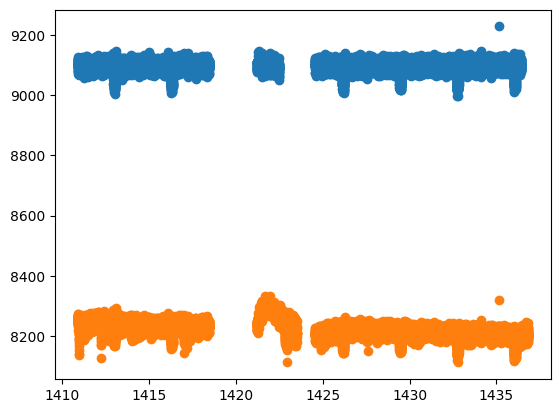

In [10]:
plt.scatter(tess_bjds,pdcsap_fluxes)
plt.scatter(tess_bjds,sap_fluxes)

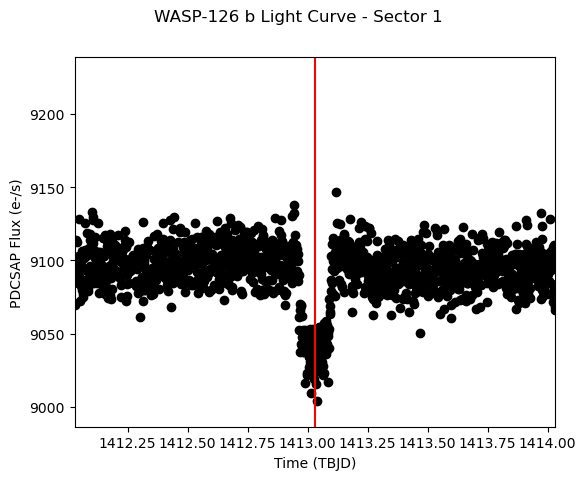

In [26]:
# Plot only transit

# Define the epoch of primary transit in TBJD.  Our timestamps are also already in TBJD.
#t0 = 2037.895
t0 = 1413.03

# Start figure and axis.
fig, ax = plt.subplots()

# Plot the timeseries in black circles.
ax.plot(tess_bjds, pdcsap_fluxes, 'ko')

# Center the x-axis on where we expect a transit to be (time = T0), and set
# the x-axis range within +/- 1 day of T0.
ax.set_xlim(t0 - 1.0, t0 + 1.0)

# Overplot a red vertical line that should be where the transit occurs.
ax.axvline(x=t0, color="red")

# Let's label the axes and define a title for the figure.
fig.suptitle("WASP-126 b Light Curve - Sector 1")
ax.set_ylabel("PDCSAP Flux (e-/s)")
ax.set_xlabel("Time (TBJD)")

# Adjust the left margin so the y-axis label shows up.
plt.subplots_adjust(left=0.15)
plt.show()

In [11]:
# There's usually quality flags
with fits.open(fits_file, mode="readonly") as hdulist:
    qual_flags = hdulist[1].data['QUALITY']

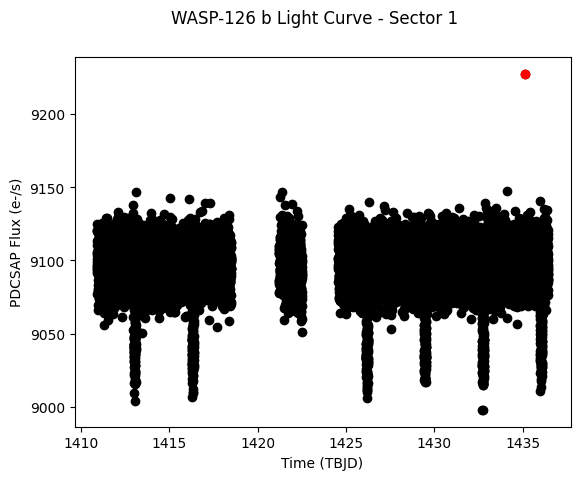

In [12]:
# Start figure and axis.
fig, ax = plt.subplots()

# Plot the timeseries in black circles.
ax.plot(tess_bjds, pdcsap_fluxes, 'ko')

# Locate quality flags greater than zero.
where_gt0 = np.where(qual_flags > 0)[0]

# Overplot the fluxes with quality flags greater than zero in red.
ax.plot(tess_bjds[where_gt0], pdcsap_fluxes[where_gt0], 'ro')

# Let's label the axes and define a title for the figure.
fig.suptitle("WASP-126 b Light Curve - Sector 1")
ax.set_ylabel("PDCSAP Flux (e-/s)")
ax.set_xlabel("Time (TBJD)")
plt.show()